Playing with plt.imshow from [tutorial](https://matplotlib.org/users/image_tutorial.html)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
img = mpimg.imread('stinkbug.png')

This sample image from the tutorial is a 24-bit RGB PNG image (although the actual image is b&w, it is stored as RGB). 

24-bit RGB means that each pixel has an R,G & B value that's encoded by 8-bits. Apparently, the human eye can't resolve color much beyond 8 bits per channel, so this is a common standard.

RGBA images would have 4 channels per pixel where the 4th is transparency.
Single-channel greyscale (luminosity) images, which this could be stored as but is not, just have a single value for each pixel.

matplotlib's native functions can only handle PNG. There is a library called Pillow to handle other types.

And by "handle", I mean that it easily converts the PNG file into a numpy array. If you actually look at the source for that PNG, it's a bunch of machine-readable-only garbage. Fortunately, matplotlib can easily turn it into numeric arrays (which, I presume take up more memory & so are not the way PNG files are actually stored).

Once converted by the mpimg.imread command, the PNG garbage turns into a beautiful 3D array:

- each pixel has 3 values for R, G, B
  - In this case, they're all near identical because it's B&W rendered as RGB
- each row is made of x pixels (500 if I have the array shape right)
- the whole image is made of y rows (375)

In [7]:
print img.shape
print img[0].shape

(375, 500, 3)
(500, 3)


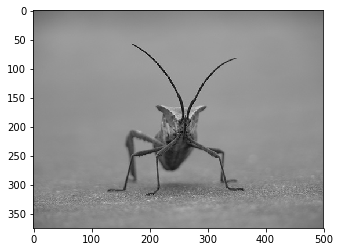

In [10]:
imgplot = plt.imshow(img)

Whoa! It works! Note that it displays the image inline thanks to the very first command up top.

The tutorial goes on to show off some sweet pseudocolor tricks.

These only work with single channel, greyscale, luminosity images. This image is 3-channel RGB, but as we've said, all the channels are (near) identical because it's actually B&W, so we can just slice the image into a sub-array to grab the first channel & make that a new array-image.

In [11]:
lum_img = img[:,:,0]

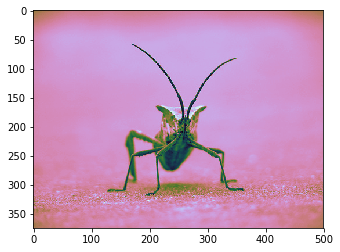

In [24]:
plt.imshow(lum_img).set_cmap('cubehelix')
#There are a bunch of options for the pseudocolor:
#https://matplotlib.org/api/pyplot_summary.html
#If you leave off that set_cmap method, it defaults to a rather
#boring green.

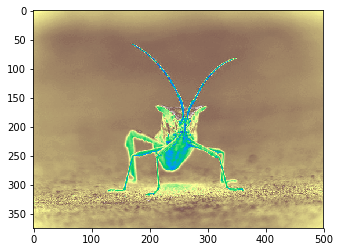

In [27]:
#Or you can set the cmap after assigning a plt object
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('terrain')